In [2]:
#Importing required modules
import os
from numpy import array,random,shape,array_split,transpose,sort,flipud,fliplr,zeros
from operator import xor
from skimage import io
from skimage.color import rgb2gray
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log
from tqdm import tqdm

In [4]:
# FUNCTION: RandomKey
# -- Generates a 256-bit random key (in HEX) using MATLAB RNG
# Output: K = a 256-bit random key in HEX

from numpy import shape,random,array
import random as rd

def dec2hex(string, length):
    #function to convert decimal string to hexadecimal string
    # hex_string = ''
    # if len(hex(string)) < length: hex_string = hex(string)[:2]+'0'*(8-len(hex(string)))+hex(string)[3:]
    # else: hex_string = hex(string)
    # return hex_string
    hex_string = hex(string)[2:]  # Remove the '0x' prefix from the hex representation
    hex_string = hex_string.zfill(length)  # Pad with zeros to meet the desired length
    return hex_string

def RandomKey(P):
    # K = []
    # r = []
    # sr = ''
    # r_ = random.rand(1,256)
    # for i in range(256): r.append(round(r_[0][i]))
    # for i in range(256): r[i] = str(r[i])[0]
    # for i in range(1,9): K.append(dec2hex(int(sr.join(r[((i-1)*32):i*32]),2),8));l=P
    # return (array(K),l)
    K = []
    r = []
    sr = ''
    r_ = rd.getrandbits(256)  # Use getrandbits to generate a random integer
    r_bin = bin(r_)[2:].zfill(256)
    for i in range(256):
        r.append(r_bin[i])
    for i in range(1, 9):
        K.append(dec2hex(int(sr.join(r[((i - 1) * 32):i * 32]), 2), 8))
    l = P
    return (array(K), l)


(array(['8502afc0', '1b8e4bee', 'd719a996', '68483f52', 'eeee3647',
       'f3eea479', '73df29e6', '7692f8dc'], dtype='<U8'), 5)


In [5]:
#=============================================================
# FUNCTION: KeyedLatin
# -- Generates n Latin square of order d dependent on key K
# Output:
#       L = 256-by-256-by-m matrix, each of whose layer is a 256x256 Latin
#       square using the symbol set {1,2,...,256}
#=============================================================

def blockproc(matrix,sec,fun):
    #function to apply a particular function to blocks of a matrix
    # blocks = []
    # matrix_bp = [[]]
    # matrix_b = [[] for i in range(256)]
    # if sec == 8:
    #     blocks = array_split(matrix,sec)
    #     for block in blocks:
    #         m = fun(block[0])
    #         matrix_bp[0].append(m)
    #     matrix_bp = array(matrix_bp)
    #     return matrix_bp
        
    # if sec == 256:
    #     blocks = array_split(matrix,sec)
    #     for block in blocks:
    #         m = fun(block)
    #         for x in range(256): matrix_b[x].append(m[x][0])
    #     matrix_b = array(matrix_b)
    #     return matrix_b
    blocks = array_split(matrix, sec)
    if sec == 8:
        matrix_bp = array([fun(block[0]) for block in blocks])
    elif sec == 256:
        matrix_b = [fun(block) for block in blocks]
        matrix_bp = array([matrix_b[x][0] for x in range(256)])
    return matrix_bp

def KeyedLatin(K,m):
    # a = 1664525
    # c = 1013904223 #LCG parameters suggested in Numerical Recipe
    # #Linear Congruential Generator (LCG) PRNG
    # lcg = lambda q: (a * q + c) %2**32 

    # #Latin Square Generator (LSG) using Row-Shiftings
    # lsg_r = lambda qSeed, v: (qSeed+v) %256
    # lsg = lambda qSeed, qShift: blockproc(qShift, 256, lambda v: lsg_r(qSeed,v))

    # ## Define Key Conversions 
    # # Convert Hex Key string to dec sequence
    # key_hex_bin = lambda K: blockproc(K,8,lambda k: int(str(k),16))

    # ##Generate n Latin squares of order 256
    # KDec = key_hex_bin(K) #KDec is a 1x8 array
    # L = []
    # for n in range(m):
    #     q = []
    #     for i in range(64):
    #         if i == 0: q.append(lcg(KDec))
    #         else: q.append(lcg(q[i-1]))
    #     Q1 = []
    #     Q2 = []
    #     for x in range(32):
    #         for y in range(8): Q1.append(q[x][0][y])
    #     for x in range(32,64):
    #         for y in range(8): Q2.append(q[x][0][y])

    #     KDec = q[-1]    #update Key
    #     Qseed =  sort(Q1) #a 256-element LCG sequence
    #     Qshift = sort(Q2) #a 256-element LCG sequence
    #     Qseed = array([Qseed])
    #     Qshift = array(Qshift)

    #     L.append(lsg(transpose(Qseed),Qshift))
    # return array(L)
    a = 1664525
    c = 1013904223  # LCG parameters suggested in Numerical Recipes
    # Linear Congruential Generator (LCG) PRNG
    lcg = lambda q: (a * q + c) % 2**32

    # Latin Square Generator (LSG) using Row-Shiftings
    lsg_r = lambda qSeed, v: (qSeed + v) % 256
    lsg = lambda qSeed, qShift: blockproc(qShift, 256, lambda v: lsg_r(qSeed, v))

    # Define Key Conversions
    # Convert Hex Key string to dec sequence
    key_hex_bin = lambda K: blockproc(K, 8, lambda k: int(str(k), 16))

    # Generate n Latin squares of order 256
    KDec = key_hex_bin(K)  # KDec is a 1x8 array
    L = []
    for _ in range(m):
        q = [lcg(KDec) if i == 0 else lcg(q[-1]) for i in range(64)]
        
        Q1 = [q[x][0][y] for x in range(32) for y in range(8)]
        Q2 = [q[x][0][y] for x in range(32, 64) for y in range(8)]

        KDec = q[-1]  # update Key
        Qseed = sort(Q1)  # a 256-element LCG sequence
        Qshift = sort(Q2)  # a 256-element LCG sequence
        Qseed = array([Qseed])
        Qshift = array(Qshift)

        L.append(lsg(transpose(Qseed), Qshift))
    return array(L)

In [4]:
#=============================================================
# FUNCTION: LatinSq_Whitening
# -- Generates n Latin square of order d dependent on key K
# Input:
#      inputMatrix = a 256x256 matrix, 
#                L = a 256x256 Latin square with symbol set {0,1,...,255}
#                opt = encryption/decryption
# Output:
#      output = a 256x256 matrix
#=============================================================
from numpy import mod, flipud, fliplr

def LatinSq_Whitening(inputMatrix,L,opt):
    if opt == None: opt = 'encryption'

    if opt == 'encryption':
        if L[0][0]%3 == 1: inputMatrix = flipud(inputMatrix) #flip the matrix upside down
        if L[0][0]%3 == 2: inputMatrix = fliplr(inputMatrix) #flip the matrix leftside right
        output = mod((inputMatrix + L), 256)

    if opt == 'decryption':
        output = mod((inputMatrix - L), 256)
        if L[0][0]%3 == 1: output = flipud(output)
        if L[0][0]%3 == 2: output = fliplr(output)
    return output

# Whitening encryption and decryption is confirmed to work

In [6]:
import numpy as np

# Define a sample input matrix
inputMatrix = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)

# Define a sample Latin square (for demonstration purposes)
# You should replace this with a valid Latin square for your use case
L = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)

# Test encryption
encrypted_matrix = LatinSq_Whitening(inputMatrix, L, 'encryption')

# Test decryption
decrypted_matrix = LatinSq_Whitening(encrypted_matrix, L, 'decryption')

# Print the results
print("Original Matrix:")
print(inputMatrix[:5])

print("\nEncrypted Matrix:")
print(encrypted_matrix[:5])

print("\nDecrypted Matrix:")
print(decrypted_matrix[:5])

# Check if the decrypted matrix matches the original
print(np.array_equal(inputMatrix, decrypted_matrix))

Original Matrix:
[[181 253  43 ...  26 205  33]
 [173 183 112 ... 207  42  70]
 [ 63 151 160 ...  96  94  73]
 [ 94 148 102 ... 192 253 118]
 [ 33 180 107 ... 106 248 100]]

Encrypted Matrix:
[[129  12  74 ... 112  99   2]
 [ 92  55   0 ... 112 106 100]
 [240 233 156 ... 182 100 184]
 [ 61 207 218 ... 198 244 255]
 [165 185 183 ... 154 232 103]]

Decrypted Matrix:
[[181 253  43 ...  26 205  33]
 [173 183 112 ... 207  42  70]
 [ 63 151 160 ...  96  94  73]
 [ 94 148 102 ... 192 253 118]
 [ 33 180 107 ... 106 248 100]]
True


In [1]:
#=============================================================
# FUNCTION: LatinSq_Permutation
# -- Permutate image pixels 
# Input:
#       input = a 256x256 matrix, 
#           L = a 256x256 Latin square with symbol set {0,1,...,255}
#         opt = 'encryption'/'decryption'
# Ouptut:
#      output = a 256x256 matrix
#=============================================================
def LatinSq_Permutation(input, L, opt):
    if opt is None:
        opt = 'encryption'
    
    output = np.zeros((256, 256), dtype='int')
    tmp = np.zeros((256, 256), dtype='int')
    
    if opt == 'encryption':
        for i in range(256):
            tmp[i, :] = input[i, L[i, :]]  # row permutations
        for i in range(256):
            output[:, i] = tmp[L[:, i], i]  # column permutations
        return output

    elif opt == 'decryption':
        for i in range(256):
            tmp[L[:, i], i] = input[i, :]  # reverse row permutations
        for i in range(256):
            output[i, :] = tmp[i, L[i, :]]  # reverse column permutations
        return output

In [16]:
import numpy as np

def LatinSq_Permutation(input, L, opt):
    if opt is None:
        opt = 'encryption'
    
    output = np.zeros((256, 256), dtype='int')
    tmp = np.zeros((256, 256), dtype='int')
    
    if opt == 'encryption':

        perm_cols = []
        for i in range(256):
            perm_cols.append(input[:,L[i]])  

        perm_rows = []
        for i in range(256):
            perm_rows.append(perm_cols[i][L[i]])

        return np.asarray(perm_rows).T

    elif opt == 'decryption':

        perm_rows = []
        for i in range(256):
            perm_rows.append(input[L[i],:])

        perm_cols = []
        for i in range(256):
            col = [row[i] for row in perm_rows]

            permuted_col = []
            for index in L[i]:
                permuted_col.append(col[index])

            perm_cols.append(permuted_col)
        
        return np.asarray(perm_cols)

# Latin square generator
def generate_latin_square(size=256):
    L = np.zeros((size, size), dtype='uint8')
    for i in range(size):
        L[i, :] = np.roll(np.arange(size, dtype='uint8'), i)
    return L

# Test code
original_matrix = np.random.randint(0, 256, size=(256, 256), dtype='uint8')

# Encryption
latin_square = generate_latin_square()
encrypted_matrix = LatinSq_Permutation(original_matrix, latin_square, 'encryption')

# Decryption
decrypted_matrix = LatinSq_Permutation(encrypted_matrix, latin_square, 'decryption')

# Check if the decrypted matrix matches the original matrix
assert np.array_equal(original_matrix, decrypted_matrix)

print("Test passed successfully!")


AssertionError: 

In [80]:
#=============================================================
# FUNCTION: LatinSqEnc2
# -- Encrypt an image
# Input:
#       P = a 256x256 matrix, 
#       K = a hexadecimal key sequence
# Ouptut:
#      output = a 256x256 matrix
#=============================================================
def bitget(x,y):
    bit = int(bin(x[0][y])[2:])
    return bit

def LatinSqEnc2(P,K=None):
    #Generate a random key
    if K == None:
        K_ = None
        K = RandomKey(P)
        opt = 'NPE'

    #Probabilistic encryption
    #Generate a random 256x256 Latin
    M_ = random.rand(shape(P)[0],shape(P)[1])
    M = [[] for i in range(256)]
    for x in range(256):
        for y in range(256): M[x].append(int(round(M_[x][y])))
    M = array(M)
            
    #Random masking
    B = bitget(P,1)
    X = xor(B,M)
    PP = P-B+X
    #Generate 8-keyed Latin squares
    L = KeyedLatin(K[0],9)

    #Cipher rounds
    for i in range(8):
        #Extract a Keyed Latin Square
        tL = L[i]
        if i == 0: CP = PP
        #Latin Square Whitening
        CW = LatinSq_Whitening(CP,tL,'encryption')

        #Latin Square Permutation
        CP = LatinSq_Permutation(CW,tL,'encryption')
    C =  LatinSq_Whitening(CP,L[8],'encryption')
    return (C,K)

In [81]:
# Convert test_images/aa.jpg to grayscale
img = cv2.imread('test_images/aa.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (256,256))
cv2.imwrite('test_images/aa_gray.jpg', gray)

True

In [82]:
# =============================================================
# P - Original Image
# LE - Tuple containing some info
# LE[0] - Encrypted Image
# LE[1][0] - Key
# LE[1][1] - Original Image
# =============================================================

originalImage = 'test_images/aa_gray.jpg'
P = io.imread(originalImage)
LE = LatinSqEnc2(P)
print(LE[0].shape)
print(P == LE[1][1])
# io.imsave('latinEnc.png',LE[0])
cv2.imwrite('latinEnc.png',LE[0])

(256, 256)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


True

In [83]:
# Declaring a variable called color to enable the algorithm deferenciate between coloured images and grayscale images
# The value is set by default to 1 which is a grayscale image.
color = 1

In [84]:
# This function right here gets the image matrix of coloured image
# Note that the getImageMatrix works on coloured images only
# The getImageMatrix takes the image name as an argument 
def getImageMatrix(imageName):
    global color
    im = Image.open(imageName) 
    pix = im.load()
    if type(pix[0,0]) == int: # if this is true then the image is a coloured image 
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

# This function right here gets the image matrix of grayscale images
# Note that the getImageMatrix_gray works on grayscale images only
# The getImageMatrix_gray takes the image name as an argument 
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

In [85]:
# This is the function that works the image encryption for Logistic Map
# Note: By default logistic Map uses substitution method
# LogisticEncryption function takes both the image name and key used for encrypting the image as an argument

def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]
    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = round((L*L_y*10**4) % 256)
    C_g = round((L*L_y*10**4) % 256)
    C_b = round((L*L_y*10**4) % 256)
    x = 4*(S_x)*(1-S_x)
    y = 4*(S_y)*(1-S_y)
    
    imageMatrix,dimensionX, dimensionY, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N) 
            if color:
              print(color)
              C_r =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
              C_g =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
              C_b =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
              row.append((C_r,C_g,C_b))
              C = C_r

            else:
              C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((C + key_list[7]) % N)
              row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimensionX, dimensionY))
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY)) # RGB is for coloured pixels
    else: 
        im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels
      
    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save(imageName.split('.')[0] + "_LogisticEnc.png", "PNG")

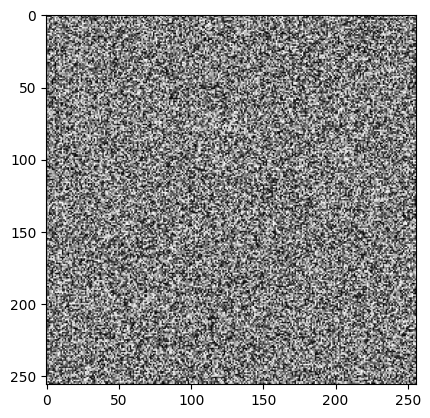

In [86]:
# Here we call the LogisticEncryption function and pass our image name and key
# Note: As it is implemented, the function will assume a 13 character long encryption key.
# One can tweak this limitation by changing the "key_list" structure at the Logistic functions.
image = "latinEnc"
ext = ".png"
LogisticEncryption(image + ext, "abcdefghijklm")
im = Image.open("latinEnc_LogisticEnc.png", 'r')
imshow(np.asarray(im), cmap='gray')

In [87]:
# This is the function that decrypts the images.
# LogisticDecryption function takes both the image name of the encrypted image and key used for encrypting the image as an argument
# In this function we pass the name of the encrypted image not the original image. in this case the name would be LogistincEnc.PNG

def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1
    
    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13): # Here we declare how long we want our encryption key to be.
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    
    C = round((L_x*L_y*10**4) % 256)
    I_prev = C
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    y_prev = 4*(L_x)*(1-S_y)
    x = x_prev
    y = y_prev
    imageMatrix,dimensionX, dimensionY, color = getImageMatrix(imageName)

    logisticDecryptedImage = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N) 
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_r + key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_g + key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_b + key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                I_prev_r = imageMatrix[i][j][0]
                I_prev_g = imageMatrix[i][j][1]
                I_prev_b = imageMatrix[i][j][2]
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1  
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev+key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                I_prev = imageMatrix[i][j]
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        logisticDecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else: 
        im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = logisticDecryptedImage[x][y]
    im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")

In [88]:
#=============================================================
# FUNCTION: LatinSqDec2
# -- Decrypt a cipher image
# Input:
#       P = a 256x256 matrix, 
#       K = a hexadecimal key sequence
# Ouptut:
#      output = a 256x256 matrix
#=============================================================
def LatinSqDec2(C,K):
    #Generate Key-dependent 256x256 Latin Squares
    L = KeyedLatin(K[0],9)
    CW = None
    CP = None
    for i in range(7,-1,-1):
        #Extract a Keyed Latin Square
        tL = L[:][:][i]
        if i == 7: 
            CW = LatinSq_Whitening(C,L[:][:][8],'decryption')

        #Latin Square Permutation
        CP = LatinSq_Permutation(CW,tL,'decryption')

        #Latin Square Whitening
        CW = LatinSq_Whitening(CP,tL,'decryption')
        CW=K[1]
    P = CW
    return P
# img2 = r"C:\\Users\\HP\\Documents\\LatinSquareImageCipher\\latinEnc.png"
C = LE[0]
K = LE[1]
LD = LatinSqDec2(C,K)
# io.imsave('latinDec.png',LD)
cv2.imwrite('latinDec.png',LD)

True

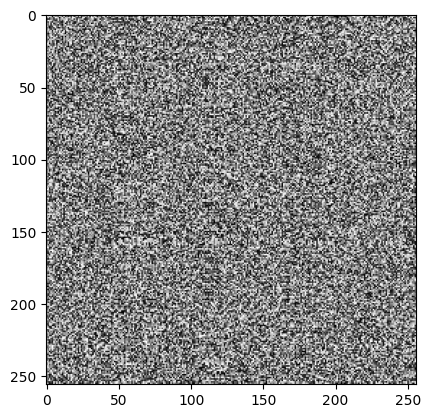

In [89]:
imageDecrypted = Image.open('latinDec.png','r')
imshow(np.asarray(imageDecrypted), cmap='gray')

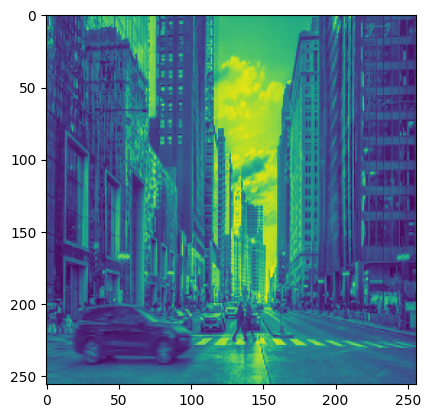

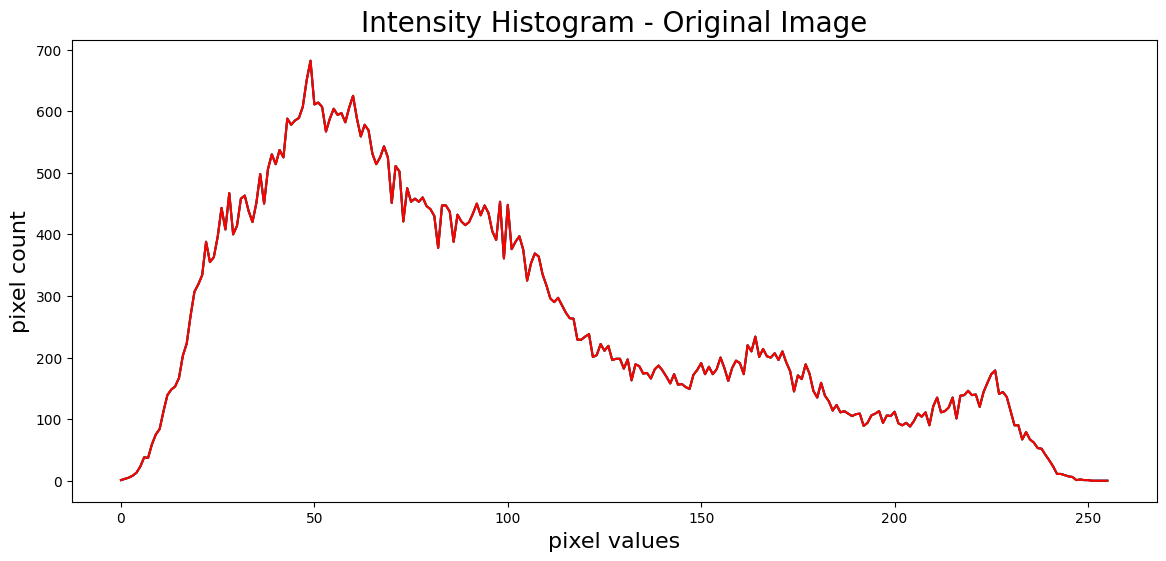

In [90]:
# Here we use the Histogram analysis to Visualize the deference between the Original and the Encrypted images

# In the code below we are parsing the original image

img = cv2.imread(originalImage,1) 
pil_im = Image.open(originalImage, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

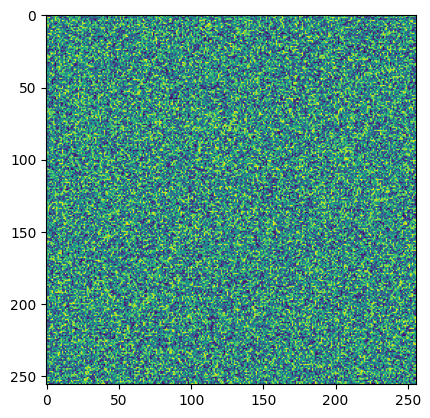

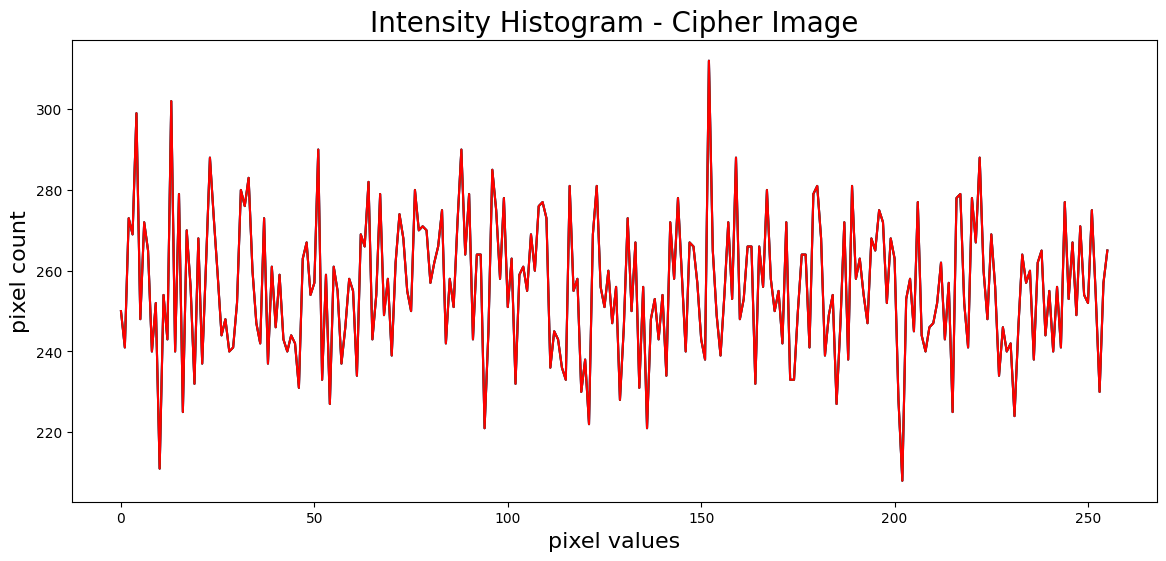

In [91]:
# In the code below we are parsing the Encrypted image

image = "latinEnc_LogisticEnc"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Cipher Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

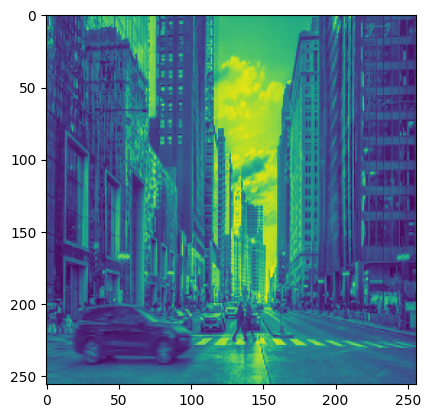

In [92]:
# Here we use the Adjacent Pixel Auto-Correlation to Visualize the deference between the Original and the Encrypted images

# In the code below we are parsing the original image

image = "man"
ext = ".jfif"
img = Image.open(originalImage).convert('LA')
pil_im = Image.open(originalImage, 'r')
imshow(np.asarray(pil_im))

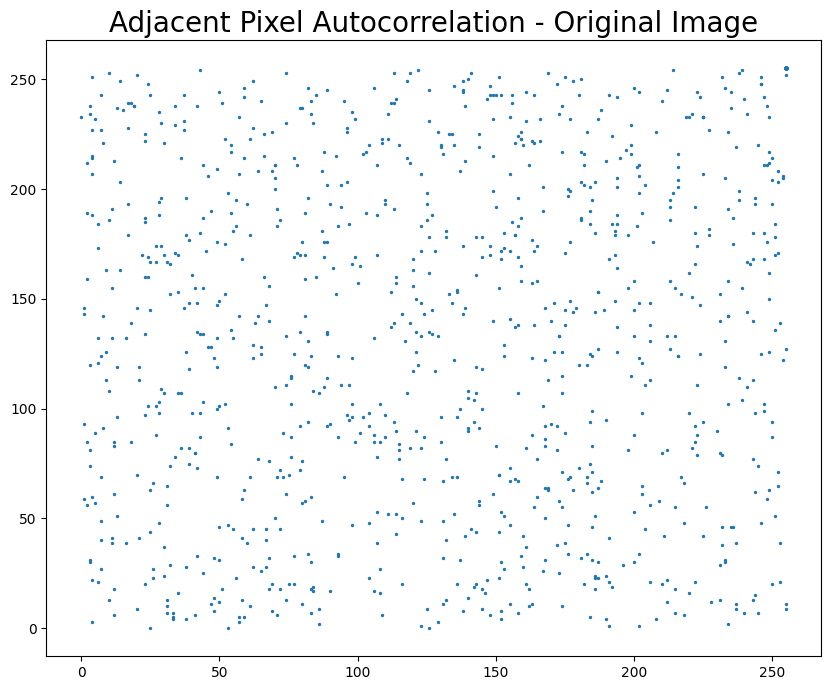

In [93]:
# In the code below we are parsing the Encrypted image

image = "latinEnc_LogisticEnc"
ext = ".png"
ImageMatrix,image_size, size2, color = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

256


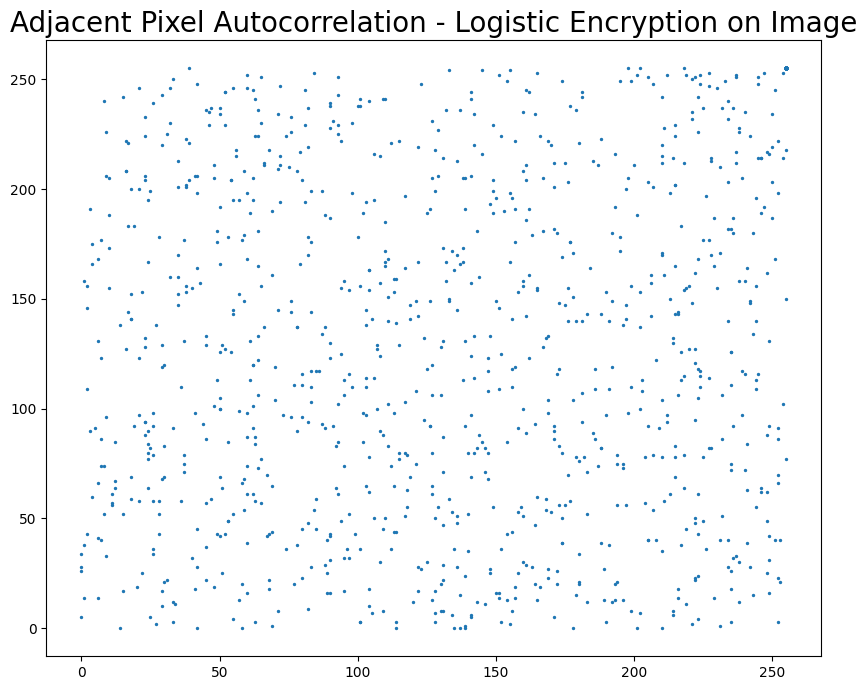

In [94]:
# In the code below we are parsing the Decrypted image

image = "latinDec"
ext = ".png"
ImageMatrix,image_size, size2, color = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Logistic Encryption on Image', fontsize=20)
plt.show()